#**Market Basket Analysis using Apriori Algorithm**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Packages 

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

# Import Data & Data Preprocessing


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Market Basket Analysis in Python using Apriori Algorithm/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [6]:
df1 = df[df['Quantity']>=0]

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [8]:
df.shape

(417534, 8)

In [9]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [10]:
df.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


### Data Cleaning 
- First, some of the descriptions have spaces that need to be removed. 
- We’ll also drop the rows that don’t have invoice numbers 
- remove the credit transactions (those with invoice numbers containing C).

In [11]:
df['Description'] = df['Description'].str.strip() #remove empty spaces
df.dropna(axis=0, subset=['Invoice'], inplace=True) #drop rows that dont have invoice numbers. 
df['Invoice'] = df['Invoice'].astype('str') #convert Invoice No to String
df = df[~df['Invoice'].str.contains('C')] #drop rows with invoice containg C which means Credit Transcation.

In [12]:
df.shape

(407695, 8)

# **Data Exploratory**


In [37]:
most_prefered_items = df.groupby(['StockCode', 'Price'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

most_prefered_items

Quantity
StockCode Price          
85123A    2.55      38937
85099B    1.65      32560
21212     0.55      27537
          0.42      25833
84077     0.18      25344
37410     0.10      25164
17003     0.19      23760
84879     1.69      23642
84077     0.21      22140
84270     0.21      20790

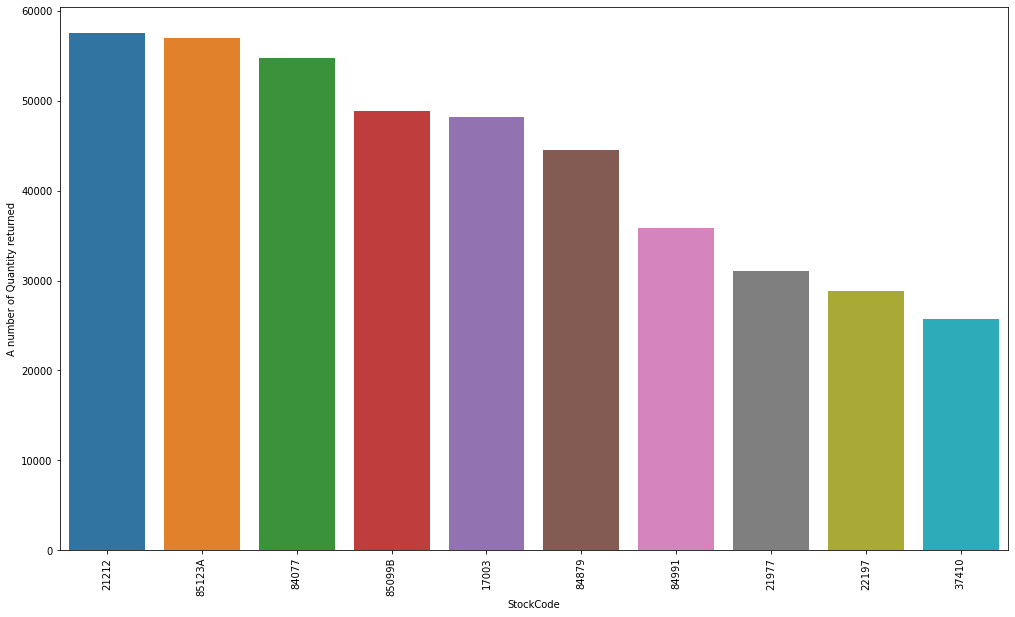

,Quantity
StockCode,
21212,57570
85123A,56915
84077,54754
85099B,48802
17003,48166
84879,44551
84991,35806
21977,31006
22197,28788


Quantity
StockCode Price          
85123A    2.55      38937
85099B    1.65      32560
21212     0.55      27537
          0.42      25833
84077     0.18      25344
37410     0.10      25164
17003     0.19      23760
84879     1.69      23642
84077     0.21      22140
84270     0.21      20790

In [38]:
most_prefered_items1 = df.groupby(['StockCode'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

most_prefered_items2 = df.groupby(['StockCode', 'Price'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False).head(10)

sns.barplot(x=most_prefered_items1.index, y=most_prefered_items1['Quantity'])
plt.ylabel('A number of Quantity returned')
plt.xticks(rotation=90)
plt.show()

display(most_prefered_items1)
display(most_prefered_items2)

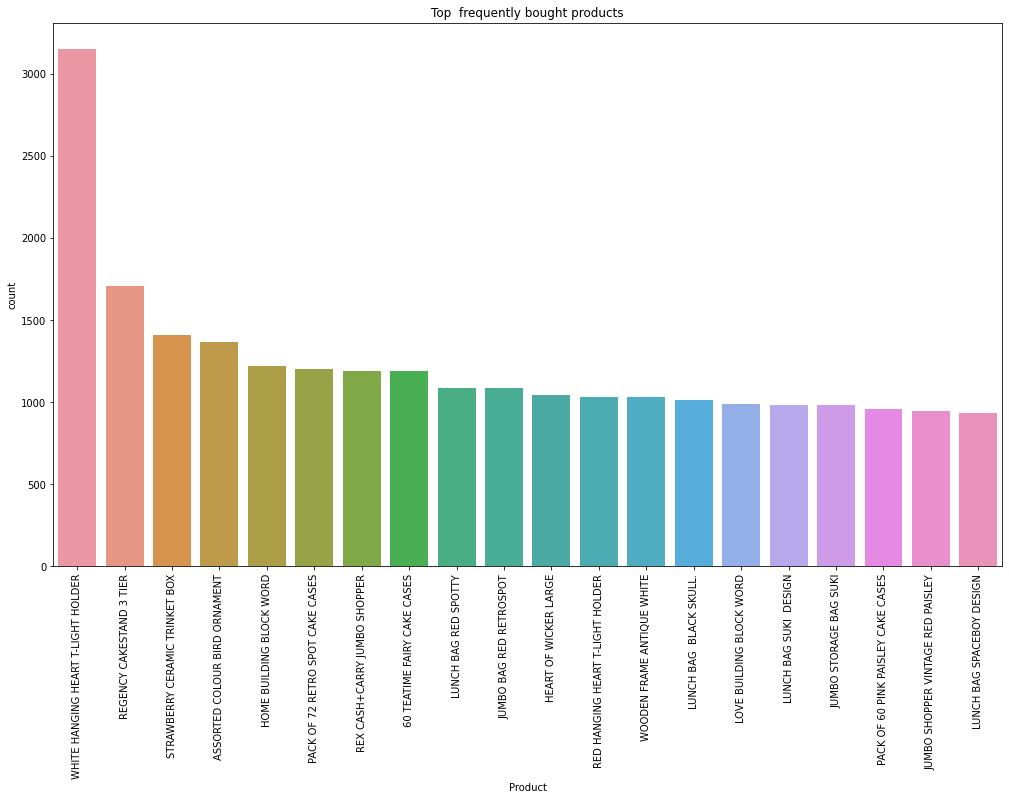

In [13]:

#Top  frequently bought products
plt.rcParams['figure.figsize']=17,10
sns.countplot(data=df, x=df['Description'],
             order = df['Description'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top  frequently bought products')
plt.show()

Quantity                   
                          sum        mean median
Country                                         
United Kingdom        4449351   11.994444    4.0
Denmark                229690  549.497608   24.0
Netherlands            183680   67.282051   24.0
EIRE                   181428   21.326907   10.0
France                 162202   29.653016   10.0
Germany                108740   14.193969   12.0
Sweden                  52429   60.402074   12.0
Spain                   22856   18.506883   10.0
Switzerland             22255   19.021368   12.0
Australia               20189   32.046032   12.0
Belgium                 12075   11.632948   10.0
Channel Islands         11991   14.605359   10.0
Portugal                11989   12.183943   10.0
Norway                   7867   21.553425   12.0
Italy                    7389   10.407042    6.0
Japan                    7311   44.579268   12.0
Austria                  6697   12.780534   12.0
Greece                   6167   12.044922   12.0
United Arab Emirates     4857   15.419048   12.0
Cyprus                   4625    8.548983    6.0
Finland                  3671   10.579251    8.0
Unspecified              3328   12.014440   10.0
USA                      2806   12.200000    6.0
Thailand                 2552   33.578947    6.0
Lithuania                2306   14.974026   12.0
Poland                   2144   11.780220   12.0
Singapore                1753   14.982906   12.0
Malta                    1549    9.111765    6.0
Israel                   1132   15.297297   12.0
Canada                    894   11.610390   12.0
Iceland                   828   11.661972   12.0
Korea                     700   13.207547   10.0
RSA                       591    9.092308   10.0
Bahrain                   495   11.785714   12.0
West Indies               395    7.314815    4.5
Brazil                    189    3.048387    2.0
Nigeria                   103    3.433333    1.0

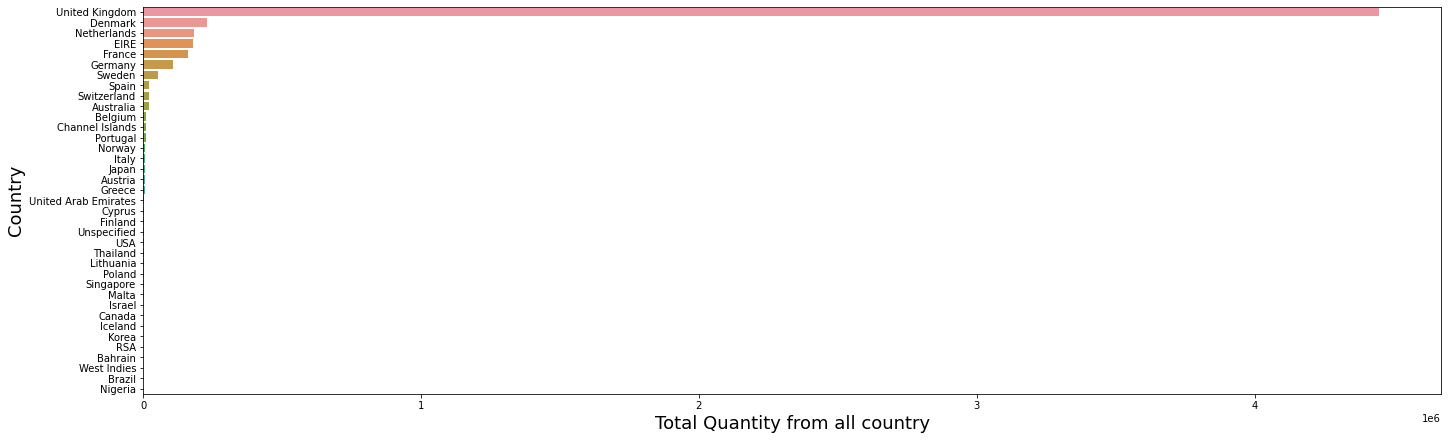

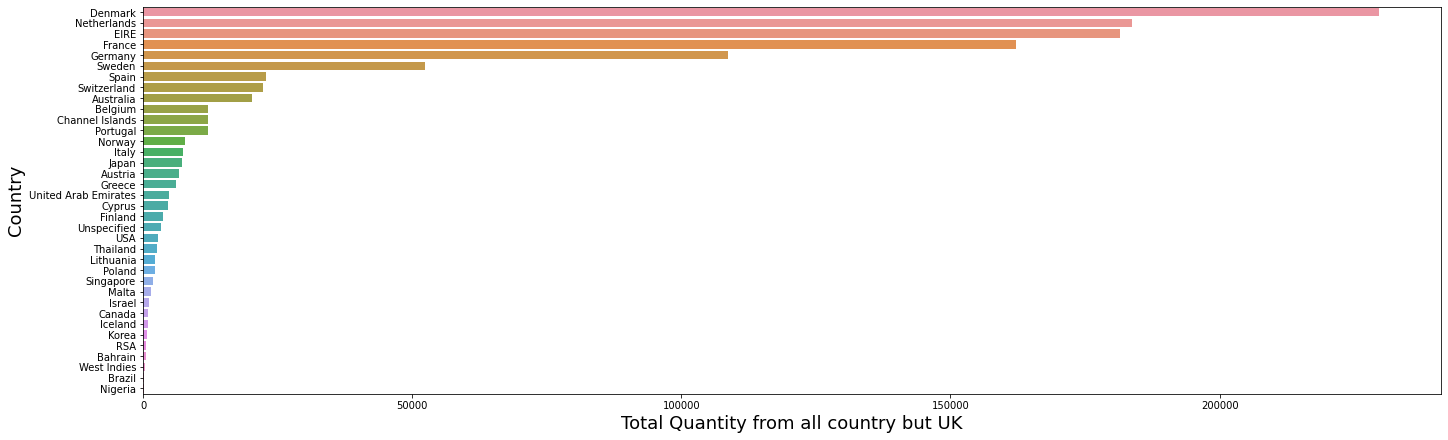

In [41]:
country_quantity = df.groupby('Country')[['Quantity']].agg(['sum',
                                        'mean',
                                        'median']).sort_values(by=[('Quantity', 'sum')], ascending=False)

display(country_quantity)

fig = plt.figure(constrained_layout=True, figsize=(20, 6))
a = sns.barplot(y=country_quantity.index, x=country_quantity[('Quantity', 'sum')])
plt.xlabel('Total Quantity from all country', fontsize=18)
plt.ylabel('Country', fontsize=18)


fig = plt.figure(constrained_layout=True, figsize=(20, 6))
country_quantity = country_quantity.drop('United Kingdom')
sns.barplot(y=country_quantity.index, x=country_quantity[('Quantity', 'sum')])
plt.xlabel('Total Quantity from all country but UK', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.show()

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, I’m only looking at sales for France.

In [14]:
basket = (df[df['Country'] =="France"]        #get data for samples which have Country as France
          .groupby(['Invoice', 'Description'])['Quantity'] #group them on InvoiceNo and Description based on Quantity
          .sum().unstack().reset_index().fillna(0) #sum the quantity, unstack them, fill 0 to nan values. 
          .set_index('Invoice')) #set the index as Invoice Number

In [15]:
basket.head()

Description  10 COLOUR SPACEBOY PEN  12 IVORY ROSE PEG PLACE SETTINGS  \
Invoice                                                                 
489439                          0.0                               0.0   
489557                          0.0                               0.0   
489883                          0.0                               0.0   
490139                          0.0                               0.0   
490152                          0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
Invoice                                                                       
489439                                   0.0                            0.0   
489557                                   0.0                            0.0   
489883                                   0.0                            0.0   
490139                                   0.0                            0.0   
490152                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE POSY  12 PENCILS SMALL TUBE RED RETROSPOT  \
Invoice                                                                        
489439                              0.0                                  0.0   
489557                              0.0                                  0.0   
489883                              0.0                                  0.0   
490139                              0.0                                  0.0   
490152                              0.0                                  0.0   

Description  12 PENCILS SMALL TUBE RED SPOTTY  12 PENCILS SMALL TUBE SKULL  \
Invoice                                                                      
489439                                    0.0                          0.0   
489557                                    0.0                          0.0   
489883                                    0.0                          0.0   
490139                                    0.0                          0.0   
490152                                    0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
Invoice                                                                      
489439                             0.0                                 0.0   
489557                             0.0                                 0.0   
489883                             0.0                                 0.0   
490139                             0.0                                 0.0   
490152                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE RED SPOTTY  12 PENCILS TALL TUBE SKULLS  \
Invoice                                                                     
489439                                   0.0                          0.0   
489557                                   0.0                          0.0   
489883                                  12.0                          0.0   
490139                                   0.0                          0.0   
490152                                   0.0                          0.0   

Description  12 PENCILS TALL TUBE WOODLAND  12 RED ROSE PEG PLACE SETTINGS  \
Invoice                                                                      
489439                                 0.0                             0.0   
489557                                 0.0                             0.0   
489883                                12.0                             0.0   
490139                                 0.0                             0.0   
490152                                 0.0                             0.0   

Description  2 DAISIES HAIR COMB  20 DOLLY PEGS RETROSPOT  \
Invoice                                                     
489439                       0.0                      0.0   
489557   

In [16]:
basket.shape

(236, 1396)


# **Hot encoding the Data**

In [17]:
#below function converts a values < 0 to 0 and value greater than equal 1 to 1.  
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
#apply function to data using applymap.
basket_sets = basket.applymap(encode_units)

In [18]:
basket_sets.head()

Description  10 COLOUR SPACEBOY PEN  12 IVORY ROSE PEG PLACE SETTINGS  \
Invoice                                                                 
489439                            0                                 0   
489557                            0                                 0   
489883                            0                                 0   
490139                            0                                 0   
490152                            0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
Invoice                                                                       
489439                                     0                              0   
489557                                     0                              0   
489883                                     0                              0   
490139                                     0                              0   
490152                                     0                              0   

Description  12 PENCILS SMALL TUBE POSY  12 PENCILS SMALL TUBE RED RETROSPOT  \
Invoice                                                                        
489439                                0                                    0   
489557                                0                                    0   
489883                                0                                    0   
490139                                0                                    0   
490152                                0                                    0   

Description  12 PENCILS SMALL TUBE RED SPOTTY  12 PENCILS SMALL TUBE SKULL  \
Invoice                                                                      
489439                                      0                            0   
489557                                      0                            0   
489883                                      0                            0   
490139                                      0                            0   
490152                                      0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
Invoice                                                                      
489439                               0                                   0   
489557                               0                                   0   
489883                               0                                   0   
490139                               0                                   0   
490152                               0                                   0   

Description  12 PENCILS TALL TUBE RED SPOTTY  12 PENCILS TALL TUBE SKULLS  \
Invoice                                                                     
489439                                     0                            0   
489557                                     0                            0   
489883                                     1                            0   
490139                                     0                            0   
490152                                     0                            0   

Description  12 PENCILS TALL TUBE WOODLAND  12 RED ROSE PEG PLACE SETTINGS  \
Invoice                                                                      
489439                                   0                               0   
489557                                   0                               0   
489883                                   1                               0   
490139                                   0                               0   
490152                                   0                               0   

Description  2 DAISIES HAIR COMB  20 DOLLY PEGS RETROSPOT  \
Invoice                                                     
489439                         0                        0   
489557   

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that I could get enough useful examples)

## ** Training Apriori algorithm on the dataset**

In [20]:

frequent_itemsets = apriori(basket_sets, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.745763,(POSTAGE),1
1,0.266949,(RED TOADSTOOL LED NIGHT LIGHT),1
2,0.241525,"(POSTAGE, RED TOADSTOOL LED NIGHT LIGHT)",2
3,0.207627,(ROUND SNACK BOXES SET OF4 WOODLAND),1
4,0.190678,(RED/WHITE DOT MINI CASES),1
5,0.182203,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",2
6,0.177966,(LUNCH BOX WITH CUTLERY RETROSPOT),1
7,0.173729,"(RED/WHITE DOT MINI CASES, POSTAGE)",2
8,0.165254,(PLASTERS IN TIN CIRCUS PARADE),1
9,0.156780,(RED SPOTTY CHARLOTTE BAG),1


In [36]:
frequent_itemsets[ (frequent_itemsets['length']  == 2) &
                        (frequent_itemsets['support'] >= 0.2) ]

,support,itemsets,length
2,0.241525,"(POSTAGE, RED TOADSTOOL LED NIGHT LIGHT)",2


# **Define the rules:**
 The final step is to generate the rules with their corresponding support, confidence and lift.

In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.745763,0.266949,0.241525,0.323864,1.213203,0.042445,1.084176
1,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.266949,0.745763,0.241525,0.904762,1.213203,0.042445,2.669492
2,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.745763,0.207627,0.182203,0.244318,1.176716,0.027363,1.048554
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.207627,0.745763,0.182203,0.877551,1.176716,0.027363,2.076271
4,(RED/WHITE DOT MINI CASES),(POSTAGE),0.190678,0.745763,0.173729,0.911111,1.221717,0.031528,2.860169


In [28]:
#we look for a large lift (6) and high confidence (.8)
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.122881,0.135593,0.101695,0.827586,6.103448,0.085033,5.013559
114,"(PLASTERS IN TIN SPACEBOY, POSTAGE)",(PLASTERS IN TIN WOODLAND ANIMALS),0.080508,0.139831,0.072034,0.894737,6.398724,0.060776,8.171610
282,"(PLASTERS IN TIN SPACEBOY, POSTAGE, PLASTERS I...",(PLASTERS IN TIN WOODLAND ANIMALS),0.059322,0.139831,0.059322,1.000000,7.151515,0.051027,inf
343,"(CIRCUS PARADE LUNCH BOX, ROUND SNACK BOXES SE...",(SPACEBOY LUNCH BOX),0.063559,0.135593,0.055085,0.866667,6.391667,0.046467,6.483051
344,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...",(CIRCUS PARADE LUNCH BOX),0.059322,0.118644,0.055085,0.928571,7.826531,0.048047,12.338983
350,"(PLASTERS IN TIN CIRCUS PARADE, SPACEBOY LUNCH...",(CIRCUS PARADE LUNCH BOX),0.063559,0.118644,0.055085,0.866667,7.304762,0.047544,6.610169
391,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN STR...",(PLASTERS IN TIN CIRCUS PARADE),0.055085,0.165254,0.055085,1.000000,6.051282,0.045982,inf
450,(EDWARDIAN PARASOL RED),(EDWARDIAN PARASOL BLACK),0.063559,0.084746,0.050847,0.800000,9.440000,0.045461,4.576271
461,"(POSTAGE, BLUE SPOTTY CUP)",(PINK SPOTTY CUP),0.055085,0.067797,0.050847,0.923077,13.615385,0.047113,12.118644
465,(BLUE SPOTTY CUP),"(POSTAGE, PINK SPOTTY CUP)",0.059322,0.067797,0.050847,0.857143,12.642857,0.046826,6.525424


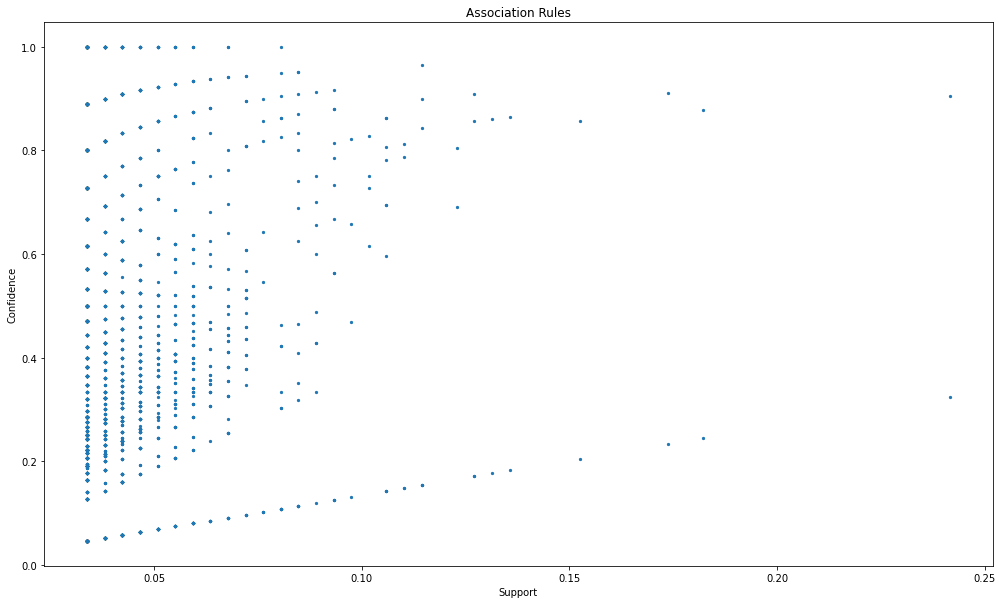

In [29]:
rules.plot.scatter("support", "confidence", alpha=1, marker=".")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


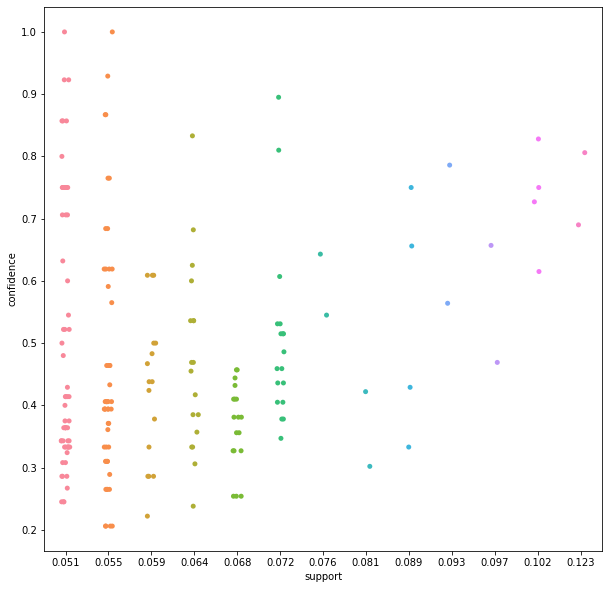

In [59]:
basket_gm=df[df['Country']=='France'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')
baskets_gm=basket_gm.applymap(encode_units)
baskets_gm.drop('POSTAGE',inplace=True,axis=1)  
frequent_items_gm=apriori(baskets_gm,min_support=0.05,use_colnames=True) #lower cutoff for support for Germany
rules_gm=association_rules(frequent_items_gm,metric="lift",min_threshold=1)
rules_tran_gm=pd.DataFrame(rules_gm[['antecedents','consequents','lift','confidence','support']])
#filter top rules
top_rules_gm=rules_tran_gm.groupby(['antecedents', 'consequents']).first().reset_index().sort_values(['lift'],ascending=False).head()
plt.figure(figsize=(10,10))
sns.stripplot(round(rules_tran_gm['support'],3), round(rules_tran_gm['confidence'],3),data=rules_tran_gm,jitter=True)
plt.show()